In [1]:
#Carga de las librerias necesarias

import numpy as np
import pandas as pd

# Visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadisticas
from statsmodels.graphics.gofplots import qqplot
# Esta funcion compara la distribucion de la muestra con una distribucion normal, para comprobar si tu muestra se distribuye normalmente o no.

In [5]:
# Cargar los datos en un dataframe
Internet_Penetracion = pd.read_csv(r'C:\Users\oomph\Documents\Henry Data Science\Proyecto-TelecomArg-main\Internet_Penetracion.csv', sep = ',')
Internet_Penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [7]:
Internet_Penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [6]:
# Revisar calidad de los datos
Internet_Penetracion.isnull().sum() # Revisar si hay valores faltantes


Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [ ]:
# Revisar calidad de los datos
Internet_Penetracion.dtypes # Verificar los tipos de datos de cada columna


Año                              int64
Trimestre                        int64
Provincia                       object
Accesos por cada 100 hogares    object
dtype: object

In [ ]:
# Resumen estadístico de la variable "Accesos por cada 100 hogares"
Internet_Penetracion["Accesos por cada 100 hogares"].describe() # Estadísticas descriptivas


count       840
unique      779
top       32,49
freq          5
Name: Accesos por cada 100 hogares, dtype: object

In [ ]:
# Reemplazar la coma por un punto en la columna "Accesos por cada 100 hogares"
Internet_Penetracion["Accesos por cada 100 hogares"] = Internet_Penetracion["Accesos por cada 100 hogares"].str.replace(",", ".")

# Convertir la variable "Accesos por cada 100 hogares" a flotante
Internet_Penetracion["Accesos por cada 100 hogares"] = Internet_Penetracion["Accesos por cada 100 hogares"].astype(float)

# Calcular la mediana de "Accesos por cada 100 hogares"
print(Internet_Penetracion["Accesos por cada 100 hogares"].median())


45.900000000000006


C:\Users\oomph\AppData\Local\Temp\ipykernel_2288\924710805.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_int_pen = Internet_Penetracion.corr()


<AxesSubplot: >

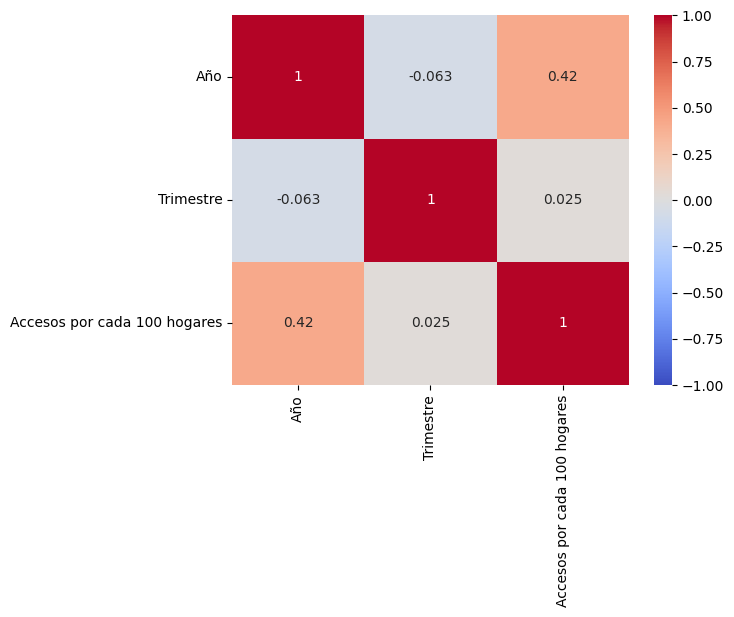

In [ ]:
# Matriz de correlación - Internet Penetracion
corr_int_pen = Internet_Penetracion.corr()
sns.heatmap(corr_int_pen, annot=True, cmap="coolwarm", vmin=-1, vmax=1) # Mapa de calor


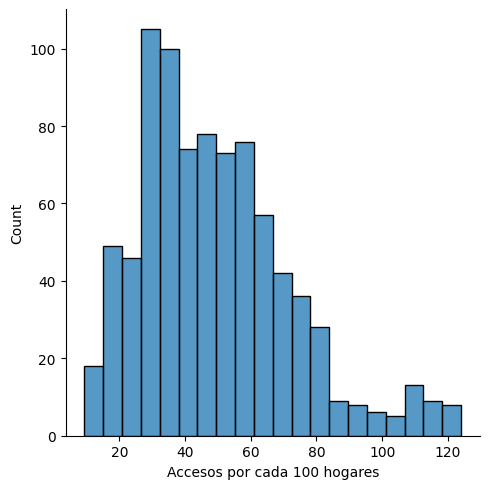

In [ ]:
# Visualización de la distribución
sns.displot(data=Internet_Penetracion, x="Accesos por cada 100 hogares", kde=False, bins=20) # Histograma


<AxesSubplot: xlabel='Accesos por cada 100 hogares'>

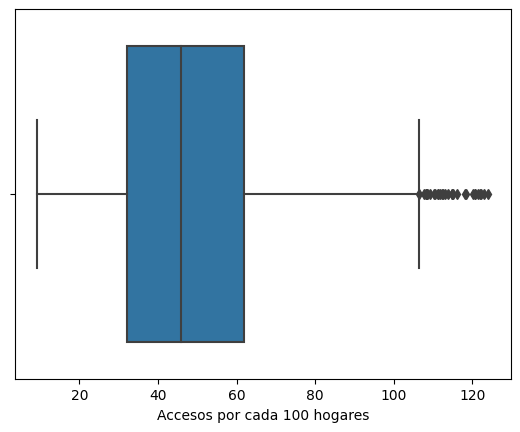

In [ ]:
sns.boxplot(data=Internet_Penetracion, x="Accesos por cada 100 hogares") # Diagrama de caja y bigotes


<AxesSubplot: xlabel='Accesos por cada 100 hogares', ylabel='Density'>

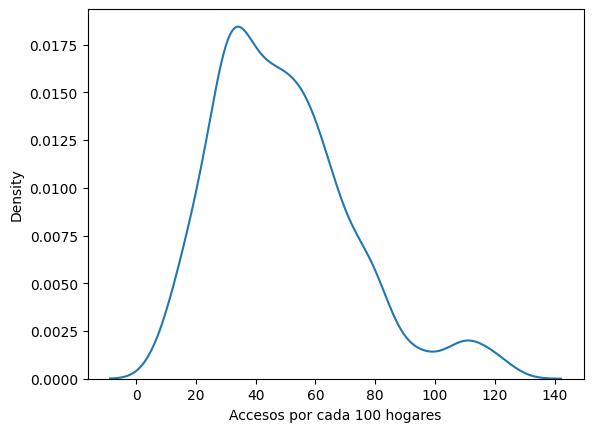

In [ ]:
sns.kdeplot(data=Internet_Penetracion, x="Accesos por cada 100 hogares") # Diagrama de densidad

In [ ]:

# Agrupación y análisis de tendencias
Internet_Penetracion.groupby("Provincia")["Accesos por cada 100 hogares"].mean() # Calcular el promedio por provincia



Provincia
Buenos Aires            63.552000
Capital Federal        113.379429
Catamarca               35.908000
Chaco                   33.182857
Chubut                  52.187143
Corrientes              35.139429
Córdoba                 66.356286
Entre Ríos              50.797429
Formosa                 26.214857
Jujuy                   35.276000
La Pampa                70.605143
La Rioja                41.498857
Mendoza                 36.862286
Misiones                35.016857
Neuquén                 61.908286
Río Negro               53.143143
Salta                   41.427429
San Juan                33.125143
San Luis                43.027429
Santa Cruz              32.635143
Santa Fe                62.392000
Santiago Del Estero     32.150286
Tierra Del Fuego        78.151714
Tucumán                 43.640857
Name: Accesos por cada 100 hogares, dtype: float64

In [ ]:
Internet_Penetracion.groupby(["Año", "Trimestre"])["Accesos por cada 100 hogares"].mean() # Calcular el promedio por trimestre

Año   Trimestre
2014  1            36.195417
      2            36.636250
      3            37.342083
      4            37.394583
2015  1            38.509167
      2            38.970417
      3            39.644167
      4            39.669583
2016  1            38.922500
      2            39.890000
      3            40.311250
      4            40.435417
2017  1            39.560000
      2            40.291667
      3            45.372500
      4            44.878750
2018  1            45.953750
      2            47.532917
      3            49.637500
      4            50.785833
2019  1            51.339167
      2            54.309583
      3            55.469167
      4            53.548750
2020  1            53.356250
      2            55.360417
      3            57.361250
      4            58.444583
2021  1            59.078333
      2            61.045833
      3            63.013750
      4            64.775833
2022  1            65.900417
      2            67.78333

<AxesSubplot: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

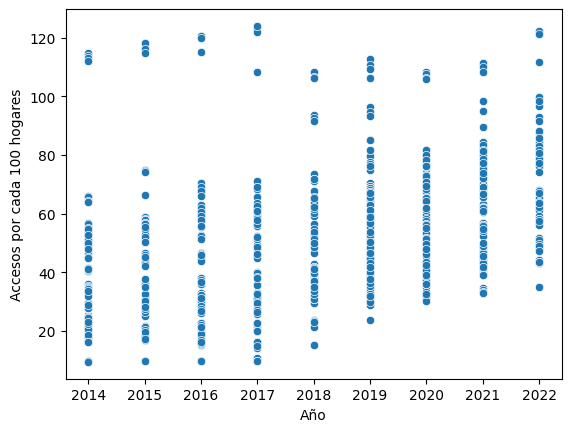

In [ ]:

# Análisis exploratorio bivariado
sns.scatterplot(data=Internet_Penetracion, x="Año", y="Accesos por cada 100 hogares") # Scatter plot


<AxesSubplot: xlabel='Trimestre', ylabel='Accesos por cada 100 hogares'>

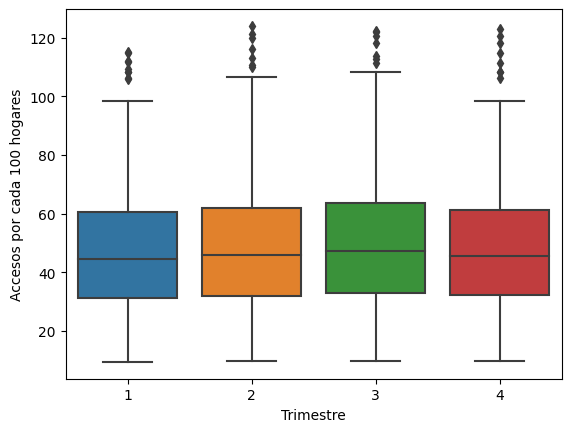

In [ ]:
sns.boxplot(data=Internet_Penetracion, x="Trimestre", y="Accesos por cada 100 hogares") # Box plot


<AxesSubplot: xlabel='Accesos por cada 100 hogares'>

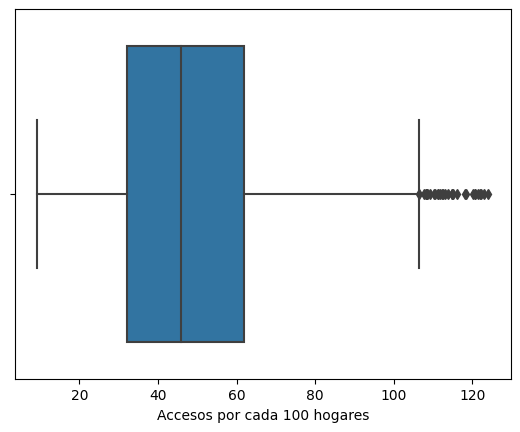

In [ ]:

# Detección de outliers
sns.boxplot(data=Internet_Penetracion, x="Accesos por cada 100 hogares") # Verificar si hay outliers